CMPE 249 Spring 2021 HW1 Object detection using berkeley deep drive dataset. 
Link to dataset: https://bdd-data.berkeley.edu/portal.html#download
Folders: images and detection2020 labels
Has 16 classes and 110K images. 


I am using tensorflow version 2.

I ran the nvidia-smi command to first check the cpu utilization and then begin my run. Earlier I ran into disk space issue and the run was crashing. I am also using GPU acceleration (Runtime ->change runtime ->GPU). I had to terminate the session and then restart it loosing a lot of time. So I started checking the cpu usage and RAM usage before major steps. 

In [1]:
!nvidia-smi

Thu Apr  1 04:25:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import tensorflow as tf
print("GPU Available: ", tf.test.is_gpu_available())

print("Tensorflow Version: ", tf.__version__)
print("Keras Version: ", tf.keras.__version__)

#check GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU Available:  True
Tensorflow Version:  2.4.1
Keras Version:  2.4.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
!protoc --version

libprotoc 3.0.0


### **Object detection API installation **

In [5]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 2535, done.
remote: Counting objects: 100% (2535/2535), done.
remote: Compressing objects: 100% (2116/2116), done.
remote: Total 2535 (delta 626), reused 1223 (delta 388), pack-reused 0
Receiving objects: 100% (2535/2535), 31.67 MiB | 34.98 MiB/s, done.
Resolving deltas: 100% (626/626), done.


Install Object Detection module from tensorflow

In [6]:
%%bash
    git clone --depth 1 https://github.com/tensorflow/models
    cd models/research/
    protoc object_detection/protos/*.proto --python_out=.
    cp object_detection/packages/tf2/setup.py .
    python -m pip install .

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1632102 sha256=be91c4154bf53007a08eab14b75dffecc79ea345e03879ad0b05e70320daac83
  Stored in directory: /tmp/pip-ephem-wheel-cache-hp8ymo0w/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
  Created wheel for avro-python3: filename=avro_python3-1.10.2-cp37-none-any.whl size=44011 sha256=b0c4f1752fae2f8dd12974fc142b42ffb261b45ac35a497370ebf0a2fad1eb09
  Stored in directory: /root/.cache/pip/wheels/ee/ee/18/c466221ca6900e3efce2f4ea9c329288808679aecdcb2838d3
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491058 sha256=a19c0cdac202bb7f762c6bc0cab51f4450bbec0292ee96a333c311059fc97b00
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
  Created wheel for dill: filename=dill-0.3.1.1-cp37-none-any.whl size=78532 sha256=a2dffd9df11b1e5e7d6895de16f464f609498889775cebad00ee

fatal: destination path 'models' already exists and is not an empty directory.
ERROR: multiprocess 0.70.11.1 has requirement dill>=0.3.3, but you'll have dill 0.3.1.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: apache-beam 2.28.0 has requirement avro-python3!=1.9.2,<1.10.0,>=1.8.1, but you'll have avro-python3 1.10.2 which is incompatible.


In [7]:
!python ./models/research/object_detection/builders/model_builder_tf2_test.py

2021-04-01 04:31:10.048448: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.7.10: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model
2021-04-01 04:31:12.636833: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-01 04:31:12.637693: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-01 04:31:12.643745: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-01 04:31:12.644278: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB devi

In [8]:
import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

%matplotlib inline

## Model selection from Tensorflow model detection zoo for object detection-  I chose faster rcnn resnet 152 v1 800x1333.

In [10]:
# Google Colab code
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet152_v1_800x1333_coco17_gpu-8.tar.gz
!tar -xf faster_rcnn_resnet152_v1_800x1333_coco17_gpu-8.tar.gz
!rm faster_rcnn_resnet152_v1_800x1333_coco17_gpu-8.tar.gz

--2021-04-01 04:32:02--  http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet152_v1_800x1333_coco17_gpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.7.144, 2607:f8b0:4004:805::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.7.144|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 476116185 (454M) [application/x-tar]
Saving to: ‘faster_rcnn_resnet152_v1_800x1333_coco17_gpu-8.tar.gz’

faster_rcnn_resnet1 100%[===================>] 454.06M   231MB/s    in 2.0s    

2021-04-01 04:32:04 (231 MB/s) - ‘faster_rcnn_resnet152_v1_800x1333_coco17_gpu-8.tar.gz’ saved [476116185/476116185]



I had all the images in different folders on my computer. I later on uploaded them all to google drive which was a very time consuming process. Further when I tried generating the tfrecord for the images in the label file, some images were missing in validation set floder but present in either the train or test folder. So finally I decided to move all of them into the same folder. 

In [ ]:
!gdown https://drive.google.com/uc?id=1nup85nINPLkuFwUE_ZBJlk4JKVzzj6yY -O "bdd100k.tar.gz"


Downloading...
From: https://drive.google.com/uc?id=1nup85nINPLkuFwUE_ZBJlk4JKVzzj6yY
To: /content/bdd100k.tar.gz
6.52GB [02:15, 48.2MB/s]


In [ ]:
!tar xvzf bdd100k.tar.gz

In [ ]:
!rm bdd100k.tar.gz

Create label map file in the .pbtxt format from the validation labels json file. Has 16 classes. 
The labels file contains a list of items. Each item describes one label.
Ex: item {
    id: 1
    name: "rider"
}
The following code reads the label json file and extracts the labels and automatically generates a label map.

Source: https://colab.research.google.com/drive/1csDft02nPaR9EX-kn_eYmsJezKZjIvCy?usp=sharing#scrollTo=56vPT-mf7tt5
https://www.kaggle.com/husseinadams/2d-object-detection-w-tensorflow-v2-and-bdd

In [19]:
import os
import sys
import json

# source: https://www.kaggle.com/husseinadams/2d-object-detection-w-tensorflow-v2-and-bdd
# Open labels file to extract class names and build labels map (.pbtxt) file
f = open('/content/bdd100k_data/labels/det_v2_val_release.json')
s = json.load(f)

# template for each 'item' in the pbtxt file
item = """item {{
  id: {id}
  name: "{name}"
}}
"""

# Function to build a label's class name
def get_class_name(single_label: dict):
  cls_label = single_label['category'].replace(' ', '_')
  if single_label['category'] == 'traffic light' and single_label['attributes']['trafficLightColor'][0] > 0:
      cls_label += '_'+single_label['attributes']['trafficLightColor'][1]
  
  return cls_label.lower()

# Extract all class names from the labels file and save in a set to ensure unique values
classes = set()
for image in s:
  if image['labels']:
    for label in image['labels']:
      classes.add(get_class_name(label))

# Sort to make sure each label maintains its ID across multiple runs 
classes = sorted(classes)

# Dictionary to map IDs to class names (used later to map text to id to generate tfrecrod)
class_text_to_int = dict()
# Write the .pbtxt file
labels_pbtxt_file = "label_map.pbtxt"
with open(labels_pbtxt_file, "w") as labels_pbtxt:
 for i in range(len(classes)):
    fitem = item.format(name=classes[i], id=i+1)
    class_text_to_int[classes[i]] = i+1
    labels_pbtxt.write(fitem)

print("Created labels map 'label_map.pbtxt' successfully...")

Created labels map 'label_map.pbtxt' successfully...


In [20]:
!cat label_map.pbtxt

item {
  id: 1
  name: "bicycle"
}
item {
  id: 2
  name: "bus"
}
item {
  id: 3
  name: "car"
}
item {
  id: 4
  name: "motorcycle"
}
item {
  id: 5
  name: "other_person"
}
item {
  id: 6
  name: "other_vehicle"
}
item {
  id: 7
  name: "pedestrian"
}
item {
  id: 8
  name: "rider"
}
item {
  id: 9
  name: "traffic_light"
}
item {
  id: 10
  name: "traffic_light_g"
}
item {
  id: 11
  name: "traffic_light_r"
}
item {
  id: 12
  name: "traffic_light_y"
}
item {
  id: 13
  name: "traffic_sign"
}
item {
  id: 14
  name: "trailer"
}
item {
  id: 15
  name: "train"
}
item {
  id: 16
  name: "truck"
}


## Create tfrecords

Source: https://medium.com/mostly-ai/tensorflow-records-what-they-are-and-how-to-use-them-c46bc4bbb564#:~:text=A%20TFRecord%20file%20stores%20your,Example%20and%20tf.

It is tensor flow's binary storage format. The TFRecord format is a simple format for storing a sequence of binary records.

In [21]:
import os
import io
import sys
import json
import numpy as np
import tensorflow as tf

from PIL import Image
from object_detection.utils import dataset_util

def create_tf_record(group, path):
    encoded_jpg = open(os.path.join(path, group['name']), 'rb').read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size
    filename = group['name'].encode('utf8')
    image_format = b'jpg'
    xmins, xmaxs, ymins, ymaxs = [], [], [], []
    classes_text, classes = [], []
    
    # Dont add labels to this tfrecord if it doesnt exist in the label map
    if group['labels']:
      # normalize coordinates for image resizing
      for label in group['labels']:
          x1 = label['box2d']['x1']
          x2 = label['box2d']['x2']
          y1 = label['box2d']['y1']
          y2 = label['box2d']['y2']
          # Skip bad labels 
          # if x1 >= x2 or y1 >= y2:
            # print("Malformed coordinates", x1, x2, y1, y2)
            # continue
          xmins.append(np.true_divide(x1,width))
          xmaxs.append(np.true_divide(x2,width))
          ymins.append(np.true_divide(y1,height))
          ymaxs.append(np.true_divide(y2,height))
          classes_text.append(get_class_name(label).encode('utf8'))
          classes.append(class_text_to_int[get_class_name(label)])

    # Create a tf record for this image and all the bounded boxes in it
    tf_record = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_record

def create_records(labels_path, images_path, output_record_name, limit):
    with tf.io.TFRecordWriter(output_record_name) as writer:
      # Open the label data to see what we're working with
      with open(labels_path, 'r') as labels_file:
        labels_json = json.load(labels_file)

        # load all images from labels to this TFrecord if no limit specified
        if limit is None:
          limit = len(labels_json)

        for i in range(limit):
            sys.stdout.write(f"\r{output_record_name} processed {i+1}/{len(labels_json)} images")
            tf_record = create_tf_record(labels_json[i], images_path)
            if tf_record is not None:
              writer.write(tf_record.SerializeToString())
              i += 1
    print('\nSuccessfully created the TFRecords: {}'.format(output_record_name))

train_size = None # int num of images (None: Convert all images)
train_labels_path = '/content/bdd100k_data/labels/det_v2_train_release.json'
train_image_path = '/content/bdd100k_data/images/'
train_record_path = 'train.record'

test_size = None # int num of images (None: Convert all images)
test_labels_path = '/content/bdd100k_data/labels/det_v2_val_release.json'
test_image_path = '/content/bdd100k_data/images/'
test_record_path = 'test.record'

for labels_path, images_path, record_name, limit in [(test_labels_path, test_image_path, test_record_path, test_size), (train_labels_path, train_image_path, train_record_path, train_size)]:
  create_records(labels_path=labels_path, images_path=images_path, output_record_name=record_name, limit=limit)

test.record processed 10000/10000 images
Successfully created the TFRecords: test.record
train.record processed 69863/69863 images
Successfully created the TFRecords: train.record


## Create pipeline config file.
For my run I modified the batch size to 1 and number of steps to 9000. Disk was running out of space, run was crashing or it was taking a very long time to traina nd finally colab would timeout. SO i had to reduce the batch size to 1 from the initial 4 and steps from 150000 to 9000. 
I tried my best to improve this but due to resource limitation for this homework I had to do this in order to make some progress.

In [23]:
num_steps = 9000 # initial number of steps

model_name = 'faster_rcnn_resnet152_v1_800x1333_coco17_gpu-8'
pretrained_checkpoint = 'faster_rcnn_resnet152_v1_800x1333_coco17_gpu-8.tar.gz'
base_pipeline_file = 'faster_rcnn_resnet152_v1_800x1333_coco17_gpu-8'
batch_size = 4

pipeline_fname = './'+ model_name + '/pipeline.config'
fine_tune_checkpoint = './' + model_name + '/checkpoint/ckpt-0'
label_map_pbtxt_fname = 'label_map.pbtxt'

num_classes = len(classes)
train_record_fname = "train.record"
test_record_fname = "test.record"

In [24]:
with open('pipeline_file.config', 'w') as f:
  import re
print('writing custom configuration file')

with open(pipeline_fname) as f:
    s = f.read()

with open('pipeline_file.config', 'w') as f:
    
    # fine_tune_checkpoint
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    # tfrecord files train and test.
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")', 'input_path: "{}"'.format(test_record_fname), s)

    # label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set training batch_size.
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)
    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)
    
    # Set number of classes num_classes.
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)
    
    #fine-tune checkpoint type
    s = re.sub(
        'fine_tune_checkpoint_type: "classification"', 'fine_tune_checkpoint_type: "{}"'.format('detection'), s)
        
    f.write(s)


writing custom configuration file


## Training

I am checking the cpu utilization and RAM and Disk space again here before training as the tensors consumes lot of disk space and compute power. This I am trying to do to make sure my run doesnt crash over and over due to limited disk space.


In [27]:
!nvidia-smi

Thu Apr  1 04:51:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    33W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [29]:
PIPELINE_CONFIG_PATH = './pipeline_file.config'
MODEL_OUTPUT_PATH = './output_model' # Tensorflow will create this output folder
!python models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --model_dir={MODEL_OUTPUT_PATH} \
    --alsologtostderr

2021-04-01 04:55:11.868346: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-04-01 04:55:20.666293: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-01 04:55:20.667455: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-01 04:55:20.714163: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-01 04:55:20.715171: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-04-01 04:55:20.715219: I tensorflow/stream_executor/platform/default/dso_loade

In [30]:
!"nvidia-smi"

Thu Apr  1 07:22:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    31W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Evaluation

Inorder to evaluate the model, call the model_main_tf2.py program with --checkpoint_dir option. The program sometimes enters infinite loop waiting for another checkpoint. Upon researching online learnt that this is a know issue. https://github.com/tensorflow/models/issues/8883

In [31]:
!python models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --model_dir={MODEL_OUTPUT_PATH} \
    --checkpoint_dir={MODEL_OUTPUT_PATH} \
    --alsologtostderr

2021-04-01 07:22:42.541906: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
W0401 07:22:47.173876 140701821953920 model_lib_v2.py:1063] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0401 07:22:47.174081 140701821953920 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0401 07:22:47.174181 140701821953920 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0401 07:22:47.174261 140701821953920 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0401 07:22:47.174368 140701821953920 model_lib_v2.py:1084] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-04-01 07:22:47.290601: I tensorflow/compiler/jit/xla

Inference

In [32]:
EXPORTED_MODEL_PATH = './exported_model' # Path to save the exported model
!python models/research/object_detection/exporter_main_v2.py --input_type image_tensor --pipeline_config_path {PIPELINE_CONFIG_PATH} --trained_checkpoint_dir {MODEL_OUTPUT_PATH}  --output_directory {EXPORTED_MODEL_PATH}

2021-04-01 09:10:54.601934: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-04-01 09:10:57.009213: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-01 09:10:57.010148: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-01 09:10:57.016630: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-01 09:10:57.017285: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-04-01 09:10:57.017325: I tensorflow/stream_executor/platform/default/dso_loade

Load model

In [33]:
import tensorflow as tf
import os
tf.keras.backend.clear_session()
detect_fn = tf.saved_model.load(os.path.join(EXPORTED_MODEL_PATH, 'saved_model'))

from object_detection.utils import label_map_util
#label_map_path='path to the label map pbtxt file'
label_map_path='./label_map.pbtxt'
label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
    label_map,
    max_num_classes=label_map_util.get_max_label_map_index(label_map),
    use_display_name=True)
category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)

Detect models

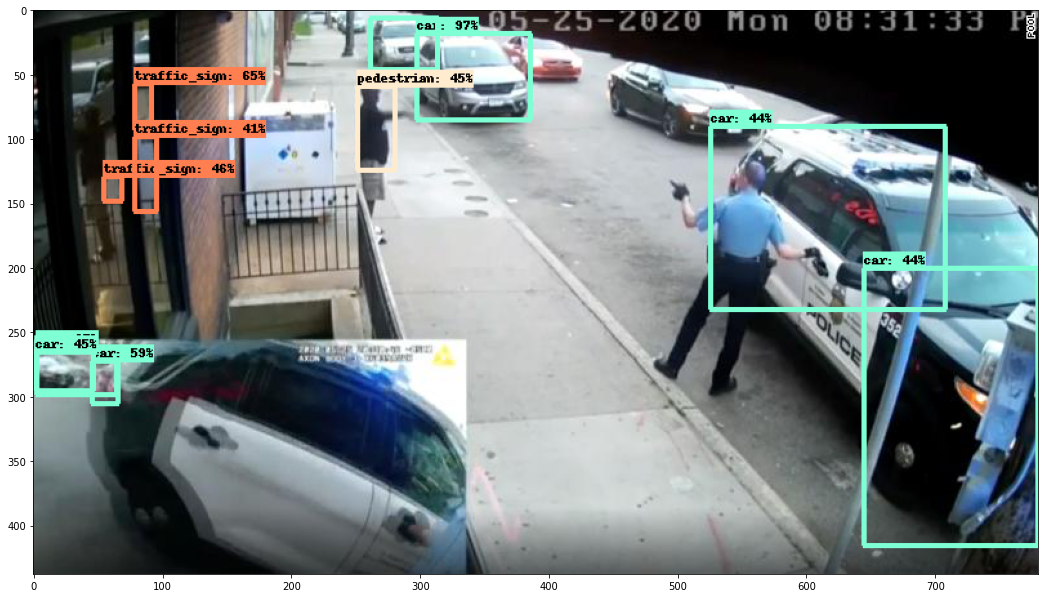

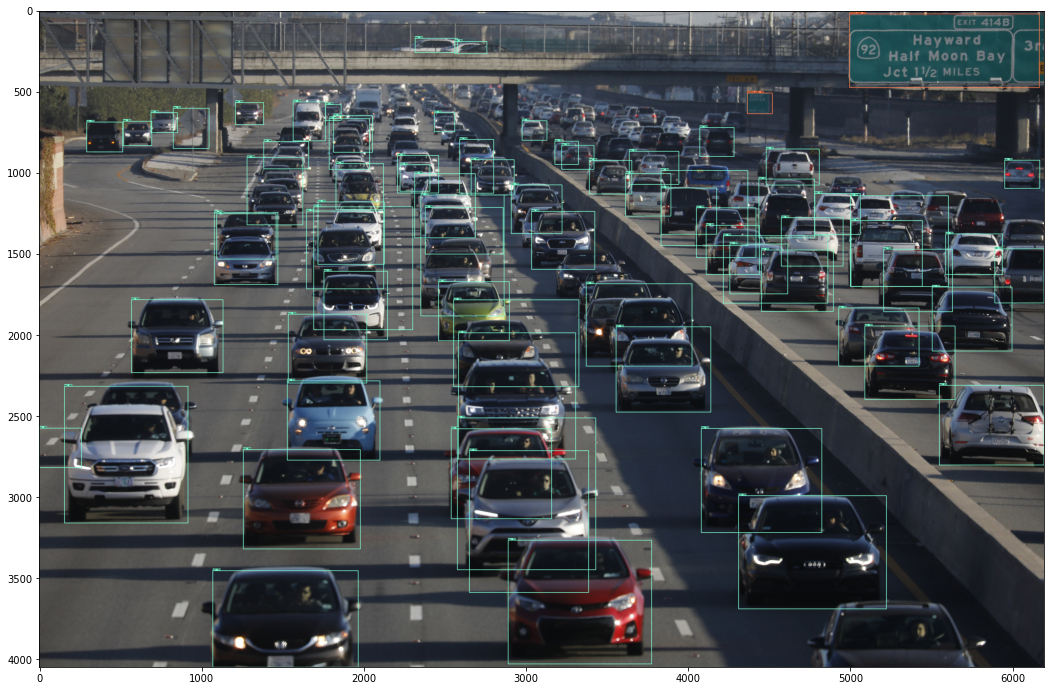

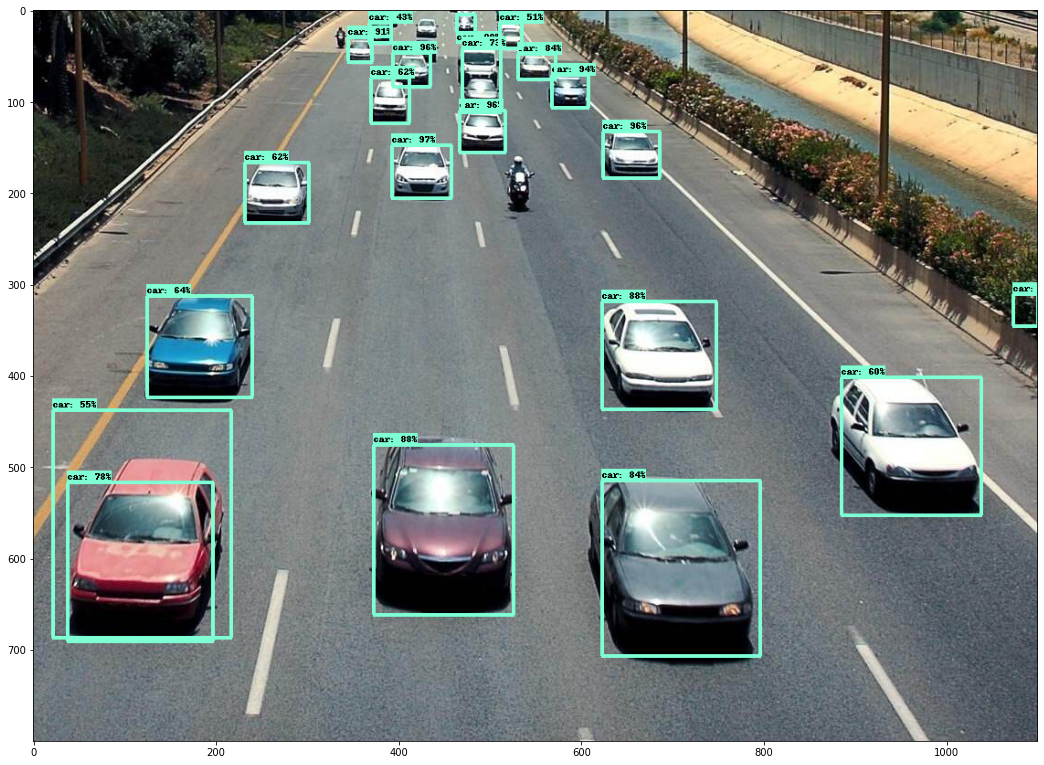

In [42]:
import time
import pathlib
import requests
from io import BytesIO
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from object_detection.utils import visualization_utils as viz_utils

%matplotlib inline

links = [
         "https://cdn.cnn.com/cnnnext/dam/assets/210331153212-05-chauvin-trial-0331-mcmillian-chauvin-interaction-exlarge-169.jpg",
         "https://www.mercurynews.com/wp-content/uploads/2019/11/SJM-L-WEEKENDS-11xx-1-1.jpg",
      #   "https://www.side.cr/wp-content/uploads/2018/06/maxresdefault-768x432.jpg",
      #   "https://images.techhive.com/images/article/2015/09/garmin_nuvicam_dashcam_day-100615653-orig.png",
      #   "https://ddot.dc.gov/sites/default/files/dc/sites/ddot/service_content/images/JI8A9910_original.jpg?itok=MaMc4ip1",
      #   "https://www.mtdemocrat.com/files/2020/04/MDE_4107ew-768x545.jpg",
         "https://marvel-b1-cdn.bc0a.com/f00000000027094/ix-cdn.b2e5.com/images/27094/27094_3063d356a3a54cc3859537fd23c5ba9d_1539205710.jpeg"
]

for link in links:
  response = requests.get(link)
  image = Image.open(BytesIO(response.content))
  (im_width, im_height) = image.size
  image_np = np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)
  # Things to try:
  # Flip horizontally
  #image_np = np.fliplr(image_np).copy()

  # Convert image to grayscale
  #image_np = np.tile(np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

  input_tensor = np.expand_dims(image_np, 0)
  detections = detect_fn(input_tensor)

  plt.rcParams['figure.figsize'] = [42, 21]
  label_id_offset = 1
  image_np_with_detections = image_np.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'][0].numpy(),
        detections['detection_classes'][0].numpy().astype(np.int32),
        detections['detection_scores'][0].numpy(),
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=.40,
        agnostic_mode=False)
  plt.figure(figsize=(18,24))
  plt.imshow(image_np_with_detections)
  plt.show()